<a href="https://colab.research.google.com/github/COMM599-Fall2023/fall_2023/blob/yueqihua-final-project/student%20folders/yueqihua/final/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

---

*Visualizations and clustering to better understand the Twitch dataset and the games dataset*

*   Input: twitch_data.csv, game_data.csv
*   No output

## Install dependencies, import modules, input credentials

In [ ]:
!pip install pandas
!pip install --upgrade scikit-learn
!pip install umap-learn

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from scipy import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import umap

## Visualizations

In [ ]:
# load csvs

twitch_df = pd.read_csv("datasets/twitch_data.csv", encoding='utf-8-sig', index_col=0)
twitch_df['month'] = twitch_df['month'].apply(lambda x: f"{x:02d}")
twitch_df['year'] = twitch_df['year'].astype(str)

game_data_df = pd.read_csv("datasets/game_data.csv", encoding='utf-8-sig', index_col=0)

##### For Twitch Data

<ipython-input-8-05d03781d64e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['date'] = pd.to_datetime(game_df[['year', 'month']].assign(day=1))


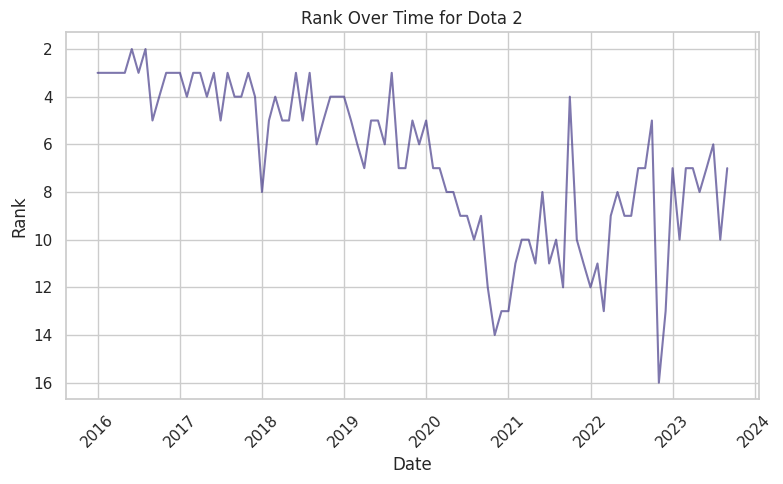

In [ ]:
# visualizing how the rank changes for a game over time

# randomly samples a game to visualize, but you can also define your own
game_name = twitch_df['game'].sample().iloc[0]
# game_name = "Terraria" # use this one if you want to define your own game

game_df = twitch_df[twitch_df['game'] == game_name]
game_df['date'] = pd.to_datetime(game_df[['year', 'month']].assign(day=1))
game_df = game_df.sort_values('date')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

plt.plot(game_df['date'], game_df['rank'], linestyle='-', alpha=0.7, color='darkslateblue')

plt.gca().invert_yaxis()

plt.title(f'Rank Over Time for {game_name}')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show() # limitation: doesn't indicate when the game is not in the top 200. may be misleading

In [ ]:
# top games by hours watched

top_games = twitch_df.groupby('game').agg({'hours_watched': 'sum', 'avg_viewers': 'mean'}).nlargest(20, 'hours_watched')
top_games.reset_index(inplace=True)

top_games

,game,hours_watched,avg_viewers
0,Dota 2,3938565038,58036.860215
1,Apex Legends,2344694625,57694.446429
2,Dead by Daylight,1191984152,18559.829545
3,Rust,970406057,14292.473118
4,Tom Clancy's Rainbow Six Siege,878669843,13020.408602
5,Path of Exile,649855204,9572.064516
6,Among Us,633993349,21747.900000
7,Destiny 2,545238688,9832.947368
8,World of Tanks,444449019,6554.064516
9,Lost Ark,435095913,29191.952381


##### For Game Data

{'Action': 614, 'Adventure': 500, 'Indie': 491, 'RPG': 268, 'Simulation': 260, 'Strategy': 226, 'Casual': 144, 'Free to Play': 103, 'Massively Multiplayer': 103, 'Early Access': 80, 'Sports': 41, 'Racing': 28, 'Sexual Content': 1, 'Nudity': 1, 'Violent': 1, 'Gore': 1}


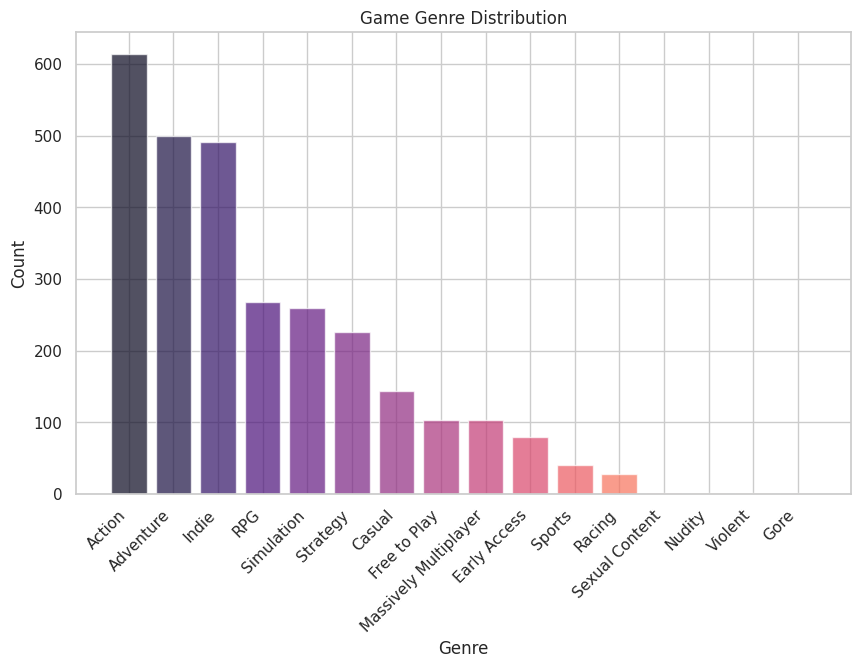

In [ ]:
# distribution of game genres

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

genre_list = game_data_df['genres'].tolist()
split_values = [genre.split(', ') for genre in genre_list] # a game can have several genres separated by commas
genre_dist = [value for sublist in split_values for value in sublist]

genre_counts = Counter(genre_dist) # using Counter to count the occurences of genres
genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))
print(genre_counts)

colors = sns.color_palette('magma', len(genre_counts))

bars = plt.bar(genre_counts.keys(), genre_counts.values(), color=colors, alpha=0.7)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Game Genre Distribution")
plt.xticks(rotation=45, ha='right')

plt.show()

{'Windows': 1040, 'Mac': 332, 'Linux': 236}


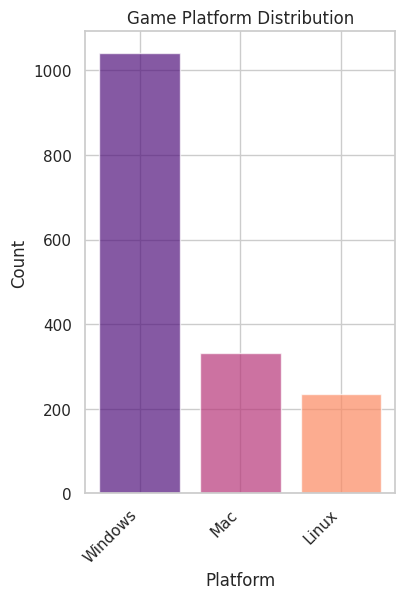

In [ ]:
# distribution of platforms (using same logic as distribution of genres)

sns.set(style="whitegrid")
plt.figure(figsize=(4, 6))

platform_list = game_data_df['platforms'].tolist()
split_values = [platform.split(', ') for platform in platform_list]
platform_dist = [value for sublist in split_values for value in sublist]

platform_counts = Counter(platform_dist)
platform_counts = dict(sorted(platform_counts.items(), key=lambda x: x[1], reverse=True))
print(platform_counts)

colors = sns.color_palette('magma', len(platform_counts))

bars = plt.bar(platform_counts.keys(), platform_counts.values(), color=colors, alpha=0.7)
plt.xlabel("Platform")
plt.ylabel("Count")
plt.title("Game Platform Distribution")
plt.xticks(rotation=45, ha='right')

plt.show()

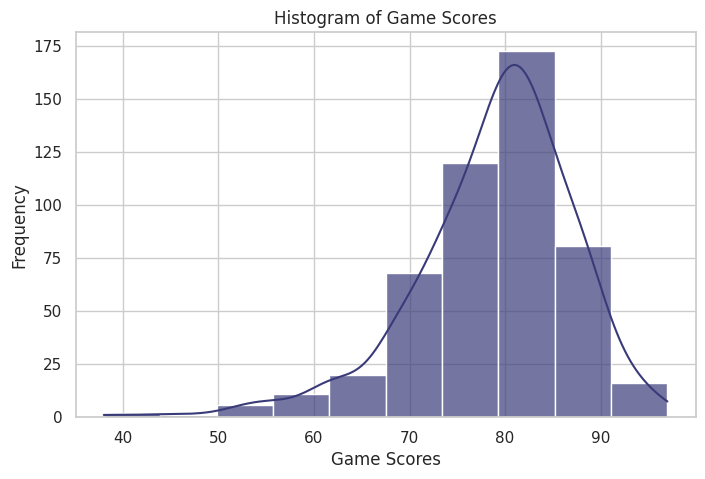

In [ ]:
# distribution of game ratings

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.set_palette('tab20b')

sns.histplot(data=game_data_df, x='score', bins=10, kde=True, alpha=0.7)
plt.xlabel("Game Scores")
plt.ylabel("Frequency")
plt.title("Histogram of Game Scores")

plt.show()

## Clustering
For Game Data

In [ ]:
game_df = game_data_df.copy()

game_df.dtypes

appid             int64
game             object
release_date     object
required_age      int64
is_free            bool
price           float64
description      object
developers       object
publishers       object
platforms        object
score           float64
genres           object
dtype: object

In [ ]:
# label encoding str values

label_encoder = preprocessing.LabelEncoder()

columns_to_encode = ['is_free', 'developers', 'publishers', 'platforms', 'genres']
for column in columns_to_encode:
    game_df[column] = label_encoder.fit_transform(game_df[column])

game_df.head()

,appid,game,release_date,required_age,is_free,price,description,developers,publishers,platforms,score,genres
0,570,Dota 2,2013-07-09,0,1,0.00,"The most-played game on Steam.Every day, milli...",749,512,3,90.0,133
1,311210,Call of Duty: Black Ops III,2015-11-05,17,0,19.79,Zombies Chronicles Deluxe EditionNow with more...,710,20,2,73.0,1
2,1407200,World of Tanks,2021-04-28,0,1,0.00,Command over 600 machines from World War II th...,762,523,0,80.0,118
3,359550,Tom Clancy's Rainbow Six Siege,2015-12-01,17,0,19.99,Edition ComparisonDeluxe EditionThe Tom Clancy...,730,504,0,NaN,0
4,1343400,RuneScape,2020-10-14,0,1,0.00,Journey into the Sixth Age of Gielinor and dis...,344,241,2,NaN,206


In [ ]:
# defining metrics and scaling

var_metrics = ['required_age', 'is_free', 'price', 'developers', 'publishers', 'platforms', 'genres']

scaler = preprocessing.StandardScaler().fit(game_df[var_metrics])
cluster_df = scaler.transform(game_df[var_metrics])

In [ ]:
def cluster_stepper(kmin, kmax,data, model, params):
    stepper = range(kmin, kmax+1)
    results = {}
    for k in stepper:
        params['n_clusters'] = k
        model = model.set_params(**params).fit(data)
        clusters = model.labels_.astype(str)
        score = metrics.silhouette_score(data, clusters)
        results[k] = {'sil' : score}
    km_results = pd.DataFrame.from_dict(results, orient='index').reset_index()
    return(km_results)

In [ ]:
# using KMeans for clustering

km_results = cluster_stepper(2, 6, cluster_df, KMeans(), {'random_state' : 42, 'n_init' : 'auto'})

<Axes: xlabel='index', ylabel='sil'>

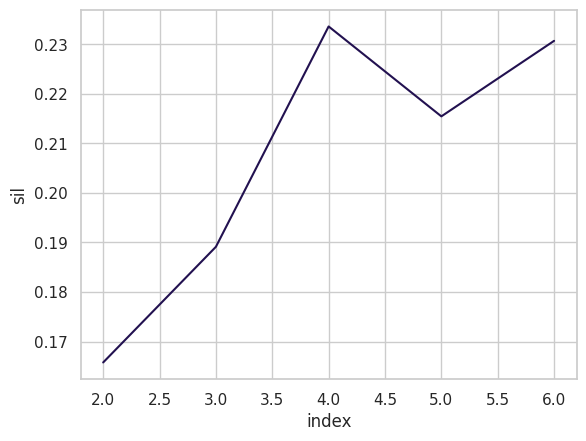

In [ ]:
sns.set_palette("magma")
sns.lineplot(data=km_results, x = 'index', y = 'sil')

In [ ]:
# 4 clusters seems to be ideal
model = KMeans(n_clusters = 4, random_state = 42, init = 'k-means++', n_init = 'auto').fit(cluster_df)

In [ ]:
model.labels_

array([2, 3, 2, ..., 2, 0, 1], dtype=int32)

In [ ]:
game_df['k_clusters'] = model.labels_.astype(str)

game_df

,appid,game,release_date,required_age,is_free,price,description,developers,publishers,platforms,score,genres,k_clusters
0,570,Dota 2,2013-07-09,0,1,0.00,"The most-played game on Steam.Every day, milli...",749,512,3,90.0,133,2
1,311210,Call of Duty: Black Ops III,2015-11-05,17,0,19.79,Zombies Chronicles Deluxe EditionNow with more...,710,20,2,73.0,1,3
2,1407200,World of Tanks,2021-04-28,0,1,0.00,Command over 600 machines from World War II th...,762,523,0,80.0,118,2
3,359550,Tom Clancy's Rainbow Six Siege,2015-12-01,17,0,19.99,Edition ComparisonDeluxe EditionThe Tom Clancy...,730,504,0,NaN,0,1
4,1343400,RuneScape,2020-10-14,0,1,0.00,Journey into the Sixth Age of Gielinor and dis...,344,241,2,NaN,206,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2203070,Dragonheir: Silent Gods,2023-10-26,0,1,0.00,Join Our DiscordBug Report1. Join the official...,568,324,0,NaN,169,2
1036,2107670,Warhaven,2023-09-20,0,1,0.00,JOIN OUR DISCORD!About the GameENTER THE FRAYW...,421,300,0,NaN,80,2
1037,2140510,Town of Salem 2,2023-08-25,0,1,0.00,The Town of Salem is in turmoil as the Coven h...,70,62,2,NaN,187,2
1038,2137700,I'm on Observation Duty 6,2023-09-01,0,0,11.99,The most ambitious I'm on Observation Duty gam...,457,321,3,NaN,209,0


In [ ]:
reducer = umap.UMAP(n_components = 2)

embedding = reducer.fit_transform(cluster_df)

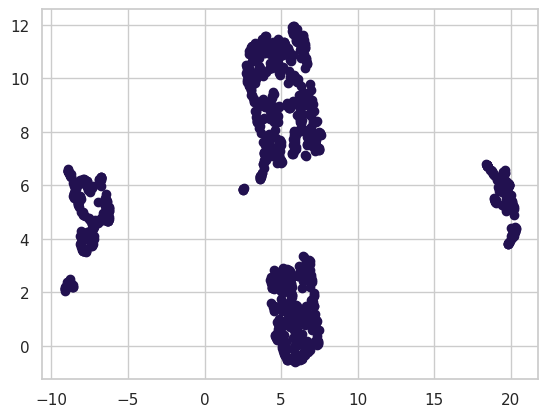

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]) # mapping clusters

In [ ]:
km_results_emb = cluster_stepper(2, 6, embedding, KMeans(), {'random_state' : 42, 'n_init' : 'auto'})

In [ ]:
km_results_emb # silhouette is highest for 4

,index,sil
0,2,0.580609
1,3,0.539526
2,4,0.757263
3,5,0.642448
4,6,0.568316


In [ ]:
emb_k = KMeans(**{'random_state' : 42, 'n_init' : 'auto', 'n_clusters' : 4}).fit(embedding)

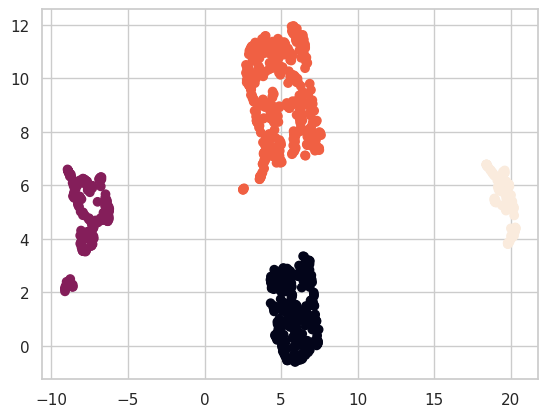

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = emb_k.labels_)

In [ ]:
game_df['cluster'] = emb_k.labels_.astype(str)

In [ ]:
game_df[var_metrics+['cluster']].groupby('cluster').mean() # seeing how metric values differ between clusters

,required_age,is_free,price,developers,publishers,platforms,genres
cluster,,,,,,,
0,0.003534,0.0,19.562155,415.936396,294.833922,2.618375,140.837456
1,16.826531,0.0,31.354337,398.321429,252.867347,0.413265,72.785714
2,0.000000,0.0,25.598826,391.413093,280.814898,0.027088,97.110609
3,1.271186,1.0,0.000000,411.042373,283.406780,0.559322,105.983051


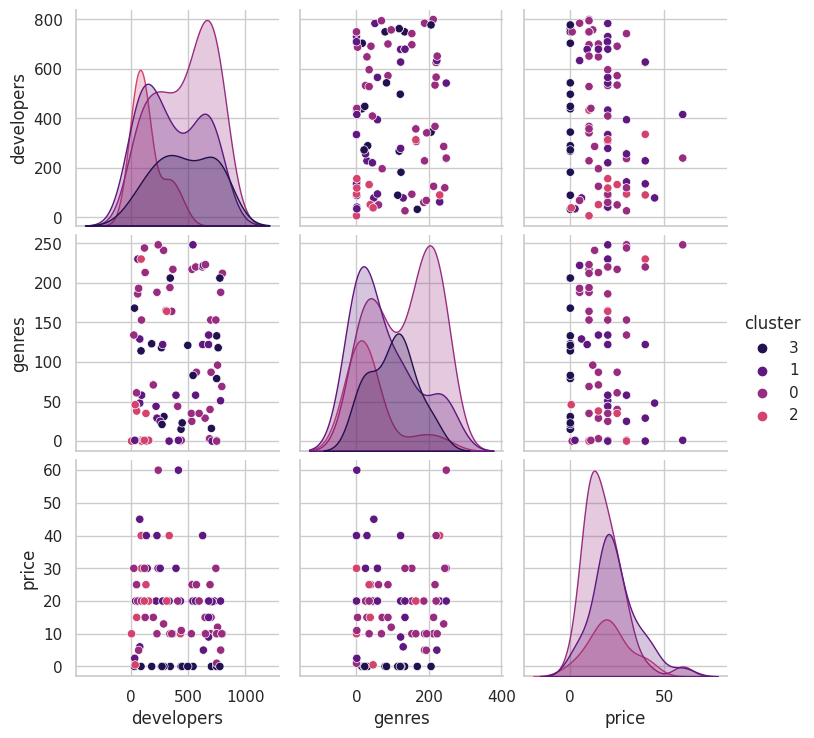

In [ ]:
sns.pairplot(game_df[['developers', 'genres', 'price', 'cluster']].head(100), hue = 'cluster')

In [ ]:
# games in cluster 0
g0 = game_df[game_df['cluster'] == '0']
print(g0.game.values)
print(g0.game.count())

['Darkest Dungeon' 'Punch Club' 'Euro Truck Simulator 2' "Garry's Mod"
 'The Witness' 'Undertale' "Sid Meier's Civilization V" 'Slime Rancher'
 'BattleBlock Theater' 'American Truck Simulator' 'Nuclear Throne'
 'Portal 2' 'SpeedRunners' 'Outlast' 'Kerbal Space Program'
 'Left 4 Dead 2' '7 Days to Die' 'Farming Simulator 15' 'Terraria'
 'Quiplash' 'The Long Dark' 'Hurtworld' 'Half-Life 2' 'Move or Die'
 'Subnautica' "Don't Starve" 'Pinball' 'Tabletop Simulator'
 'Cities: Skylines' 'XCOM 2' 'ARK: Survival Evolved' 'Firewatch'
 'The Binding of Isaac: Afterbirth' 'Stardew Valley' 'Layers of Fear'
 'ShellShock Live' 'SUPERHOT' 'Golf With Your Friends'
 'FTL: Faster Than Light' 'Evoland 2' "Don't Starve Together" 'Factorio'
 'Faeria' 'Deponia Doomsday' 'Devil Daggers' 'Geometry Dash'
 'Danganronpa: Trigger Happy Havoc' 'Europa Universalis IV' 'RimWorld'
 'Hyper Light Drifter' 'Town of Salem' 'Chess' 'Planet Coaster'
 'Stellaris' 'Gang Beasts' 'Youtubers Life'
 'Danganronpa 2: Goodbye Despair

In [ ]:
# games in cluster 1
g1 = game_df[game_df['cluster'] == '1']
print(g1.game.values)
print(g1.game.count())

['Call of Duty: Black Ops III' "Tom Clancy's Rainbow Six Siege"
 "Tom Clancy's The Division" 'Arma 3' 'DayZ' 'Fallout 4'
 "Dragon's Dogma: Dark Arisen" 'Rust' 'The Elder Scrolls V: Skyrim'
 'XCOM: Enemy Within' 'Mortal Kombat X' 'Rise of the Tomb Raider'
 'The Elder Scrolls Online' 'Resident Evil' 'Call of Duty: Black Ops II'
 'Secret of Mana' 'Alien: Isolation' 'Dying Light' 'The Forest'
 'Mount Your Friends' 'SOMA' 'Just Cause 3' 'Company of Heroes 2'
 'Borderlands 2' 'Yakuza Kiwami' 'Tales from the Borderlands'
 'Hitman: Absolution' 'Dishonored' 'The Walking Dead: Michonne'
 'Dead Space' 'PAYDAY 2' 'Heavy Rain' 'Salt and Sanctuary' 'Yakuza 0'
 'Resident Evil 4' 'Kingdom Come: Deliverance' 'Hitman: Blood Money'
 'DOOM' 'Mad Max' "Deus Ex: Human Revolution - Director's Cut"
 'Homefront: The Revolution' 'Dead by Daylight'
 'Vampire: The Masquerade - Bloodlines' 'We Happy Few' 'L.A. Noire'
 'Wolfenstein: The New Order' 'Hexen: Beyond Heretic' 'Resident Evil 2'
 'This Is the Police' 'Bey

In [ ]:
# games in cluster 2
g2 = game_df[game_df['cluster'] == '2']
print(g2.game.values)
print(g2.game.count())

['Scrap Mechanic' 'Street Fighter V' 'The Witcher 3: Wild Hunt'
 'Killer Instinct' 'Ultra Street Fighter IV' 'Halo 4' "Mirror's Edge"
 'TMNT' 'Unravel' 'Grim Dawn' 'The Solus Project' 'Exanima' 'Just Survive'
 'Ultimate Marvel vs. Capcom 3' 'NEKOPARA Vol. 2' 'Ben and Ed' 'iRacing'
 'Rabi-Ribi' 'Worms Revolution' 'The Town of Light' 'The Guest'
 'Enter the Gungeon' 'Quantum Break' 'Overlord II' 'Tower Unite'
 'RollerCoaster Tycoon World' 'Chowderchu' 'Pineview Drive'
 'Battlefleet Gothic: Armada' 'Choice Chamber'
 'S.T.A.L.K.E.R.: Call of Pripyat' "Sherlock Holmes: The Devil's Daughter"
 'Furi' 'The Elder Scrolls III: Morrowind'
 'Zero Escape: Zero Time Dilemma' 'Trials Fusion' 'Miscreated' 'Defunct'
 'Titanfall 2' 'Bully: Scholarship Edition' 'Squad' 'Tales of Berseria'
 'Cossacks 3' 'The Turing Test' 'Ghost of a Tale' 'My Summer Car'
 'Dead Space 2' 'Outlast 2' "Five Nights at Freddy's: Sister Location"
 'Horror Stories' 'Steep' 'Just Dance 2017' 'ARAYA' 'Hello Neighbor'
 'The Isle' '

In [ ]:
# games in cluster 3
g3 = game_df[game_df['cluster'] == '3']
print(g3.game.values)
print(g3.game.count())

['Dota 2' 'World of Tanks' 'RuneScape' 'SMITE' 'Path of Exile' 'Warframe'
 'War Thunder' 'World of Warships' 'Guild Wars 2' 'MapleStory'
 'Team Fortress 2' 'EVE Online' 'Naval Action' 'Knight Online'
 'APB Reloaded' 'ArcheAge' 'MechWarrior Online' 'Armored Warfare' 'Trove'
 'Dreadnought' 'Crossout' 'DC Universe Online' 'PlanetSide 2'
 'Neverwinter' 'Shadowverse' 'Riders of Icarus' 'Albion Online'
 'The Elder Scrolls: Legends' 'Battlerite' 'Paladins' 'Revelation Online'
 'Infestation: The New Z' 'Eternal Card Game' 'Yu-Gi-Oh! Duel Links'
 'Brawlhalla' 'Phoning Home' 'Deceit' 'Line of Sight' 'Crusader Kings II'
 'Skyforge' 'Quake Champions' 'Destiny 2'
 'Throne of Lies: Medieval Politics' 'VRChat' 'Ylands'
 'Islands of Nyne: Battle Royale' 'Darwin Project' 'Black Squad'
 'The Council' 'Maelstrom' 'Soulworker' 'SCP: Secret Laboratory'
 'Russian Fishing 4' 'Totally Accurate Battlegrounds'
 'The Awesome Adventures of Captain Spirit' 'Old School RuneScape'
 'Dungeon Fighter Online' 'Battleri